# a. Import the required Libraries

In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# b. Reading our Dataset

In [59]:
df = pd.read_csv('Real estate.csv')
print(df.head())

   No  X1 transaction date  X2 house age  \
0   1             2012.917          32.0   
1   2             2012.917          19.5   
2   3             2013.583          13.3   
3   4             2013.500          13.3   
4   5             2012.833           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391  

# c. Visualizing the Data using HeatMap

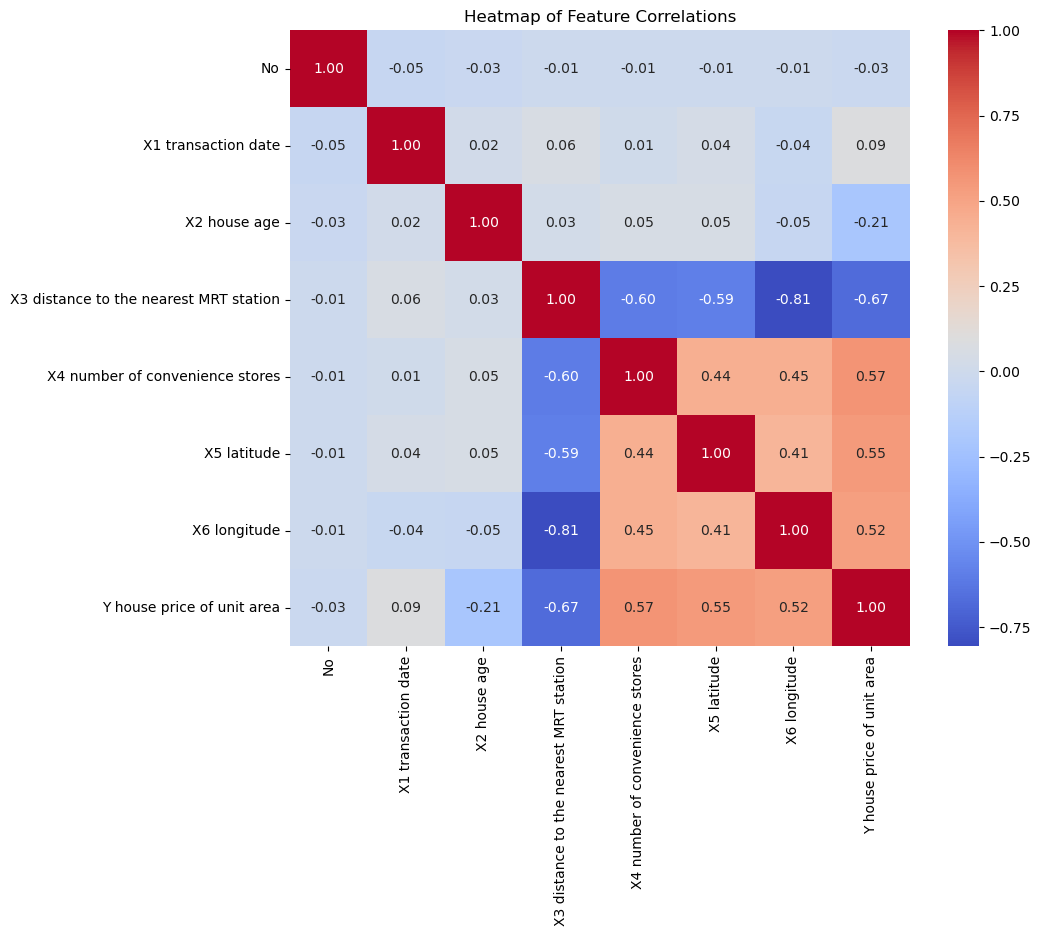

In [60]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Heatmap of Feature Correlations")
plt.show()

# d. Check the correlations in the dataset

In [61]:
print("\nCorrelation Matrix:")
print(df.corr())


Correlation Matrix:
                                              No  X1 transaction date  \
No                                      1.000000            -0.048658   
X1 transaction date                    -0.048658             1.000000   
X2 house age                           -0.032808             0.017549   
X3 distance to the nearest MRT station -0.013573             0.060880   
X4 number of convenience stores        -0.012699             0.009635   
X5 latitude                            -0.010110             0.035058   
X6 longitude                           -0.011059            -0.041082   
Y house price of unit area             -0.028587             0.087491   

                                        X2 house age  \
No                                         -0.032808   
X1 transaction date                         0.017549   
X2 house age                                1.000000   
X3 distance to the nearest MRT station      0.025622   
X4 number of convenience stores          

# e. Make features

In [62]:
X = df.drop(columns=['No', 'Y house price of unit area']) 
y = df['Y house price of unit area']

# f. Train test splitting

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# g. Generating the model and train regression model

In [64]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# h. Check Coefficients, Intercept, R-Squared Value

In [65]:
print("\nModel Coefficients:")
for col, coef in zip(X.columns, model.coef_):
    print(f"{col}: {coef:.4f}")

print(f"\nIntercept: {model.intercept_:.4f}")
print(f"R-squared on training set: {model.score(X_train, y_train):.4f}")
print(f"R-squared on test set: {model.score(X_test, y_test):.4f}")


Model Coefficients:
X1 transaction date: 5.4407
X2 house age: -0.2708
X3 distance to the nearest MRT station: -0.0048
X4 number of convenience stores: 1.0914
X5 latitude: 229.0431
X6 longitude: -29.4926

Intercept: -13044.2319
R-squared on training set: 0.5581
R-squared on test set: 0.6811


In [66]:
# i. Evaluate the model and give a proper view of performance

In [67]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"\nModel Evaluation:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R2 Score: {r2_score(y_test, y_pred):.4f}")


Model Evaluation:
Mean Squared Error: 53.5056
Root Mean Squared Error: 7.3148
R2 Score: 0.6811


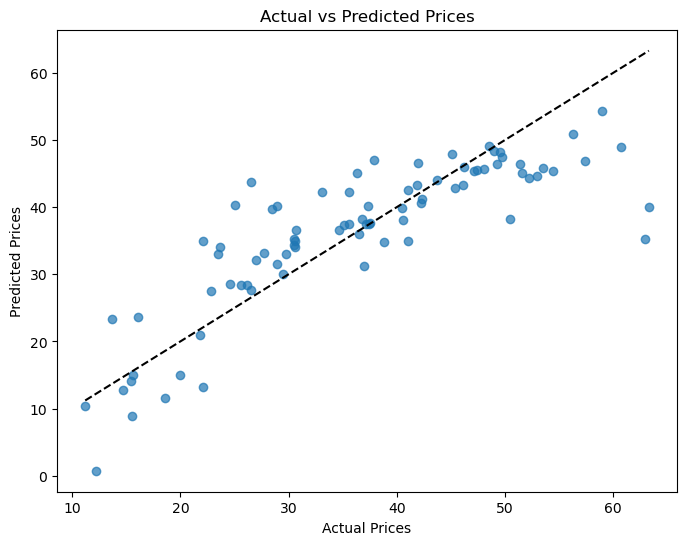

In [68]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.show()